# 第4章: 形態素解析

夏目漱石の小説『吾輩は猫である』の文章（neko.txt）をMeCabを使って形態素解析し，その結果をneko.txt.mecabというファイルに保存せよ．このファイルを用いて，以下の問に対応するプログラムを実装せよ．

なお，問題37, 38, 39はmatplotlibもしくはGnuplotを用いるとよい．

python上でなぜか実行できなかったので(´･ω･｀)
```zsh
% mecab neko.txt -o neko.txt.mecab
```

In [2]:
!head -n 10 neko.txt.mecab

一	名詞,数,*,*,*,*,一,イチ,イチ
EOS
EOS
　	記号,空白,*,*,*,*,　,　,　
吾輩	名詞,代名詞,一般,*,*,*,吾輩,ワガハイ,ワガハイ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
猫	名詞,一般,*,*,*,*,猫,ネコ,ネコ
で	助動詞,*,*,*,特殊・ダ,連用形,だ,デ,デ
ある	助動詞,*,*,*,五段・ラ行アル,基本形,ある,アル,アル
。	記号,句点,*,*,*,*,。,。,。


## 30. 形態素解析結果の読み込み
形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

In [3]:
morphemes=[] #形態素
lines=[]

for line in open('neko.txt.mecab'):
    res=line.split('\t')
    surface =res[0]
    
    if surface == "EOS\n":
        #morphemes=[]
        #lines.append(morphemes)
        pass
        
    else:
        values = res[1].split(',')
        keymap={
            "surface":surface,
            "base":values[6],
            "pos":values[0],
            "pos1":values[1]
        }
        morphemes.append(keymap)
        

In [4]:
print("surface: " +  morphemes[2]['surface'])
print("base: " + morphemes[2]['base'])
print("pos: " + morphemes[2]['pos'])
print("pos1: " + morphemes[2]['pos1'])

surface: 吾輩
base: 吾輩
pos: 名詞
pos1: 代名詞


## 31. 動詞
動詞の表層形をすべて抽出せよ．

In [5]:
verb=[]
for sentence in morphemes:
    if sentence['pos']=="動詞":
        verb.append(sentence['surface'])

In [6]:
verb[0:11]

['生れ', 'つか', 'し', '泣い', 'し', 'いる', '始め', '見', '聞く', '捕え', '煮']

## 32. 動詞の原形
動詞の原形をすべて抽出せよ．

In [7]:
verb_b=[]
for sentence in morphemes:
    if sentence['pos']=="動詞":
        verb_b.append(sentence['base'])
        #verb.append(sentence['surface'])

In [8]:
verb_b[0:11]

['生れる', 'つく', 'する', '泣く', 'する', 'いる', '始める', '見る', '聞く', '捕える', '煮る']

## 33. サ変名詞
サ変接続の名詞をすべて抽出せよ．

In [ ]:
res=[]
for sentence in morphemes:
    if sentence['pos1']=="サ変接続":
        res.append(sentence['surface'])
res[0:10]

In [9]:
res=[]
for sentence in morphemes:
    if sentence['pos']=="名詞":
        
res[0:10]

['見当', '記憶', '話', '装飾', '突起', '運転', '記憶', '分別', '決心', '我慢']

## 34. 「AのB」
2つの名詞が「の」で連結されている名詞句を抽出せよ．

In [49]:
res=[]
for i in range(len(morphemes)-2):
    triple=morphemes[i:i+3]
    x0 = triple[0]['pos'] == "名詞"
    x1 = triple[1]['surface'] == "の"
    x2 = triple[2]['pos'] == "名詞"
    if x0 and x1 and x2:
        res.append([triple[0]['surface']+triple[1]['surface']+triple[2]['surface']])

In [50]:
res[0:10]

[['彼の掌'],
 ['掌の上'],
 ['書生の顔'],
 ['はずの顔'],
 ['顔の真中'],
 ['穴の中'],
 ['書生の掌'],
 ['掌の裏'],
 ['何の事'],
 ['肝心の母親']]

## 35. 名詞の連接
名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．

In [52]:
tmp=[]
res = []
count=0
max_len=0
for sentence in morphemes:
    if sentence['pos']=="名詞":
        count+=1
        tmp.append(sentence['surface'])
        if max_len < count:
            max_len = count
            res = tmp
    else:
        count=0
        tmp=[]

(´･ω･｀)< これ本当に名詞の連接で最長一致なのか.. 英語だぞ👊

In [55]:
res

['many', 'a', 'slip', "'", 'twixt', 'the', 'cup', 'and', 'the', 'lip']

## 36. 単語の出現頻度
文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

In [63]:
from collections import Counter

words=[]
for sentence in morphemes:
    if sentence['pos'] in ['名詞','副詞','形容詞','動詞']:
        words.append(sentence['surface'])

In [99]:
for word,number in Counter(words).most_common(20):
    print(word,number)

し 2259
の 1611
いる 1249
事 1207
する 992
もの 981
君 973
云う 937
主人 932
ない 765
ん 704
ある 700
よう 696
人 602
一 554
そう 546
何 539
吾輩 481
い 478
これ 414


## 37. 頻度上位10語
出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

In [95]:
w=[]
c=[]
for word , count in Counter(words).most_common(10):
    w.append(word)
    c.append(count)

In [96]:
Counter(words).most_common(10)

[('し', 2259),
 ('の', 1611),
 ('いる', 1249),
 ('事', 1207),
 ('する', 992),
 ('もの', 981),
 ('君', 973),
 ('云う', 937),
 ('主人', 932),
 ('ない', 765)]

([<matplotlib.axis.XTick at 0x1107c0c88>,
 <a list of 10 Text xticklabel objects>)

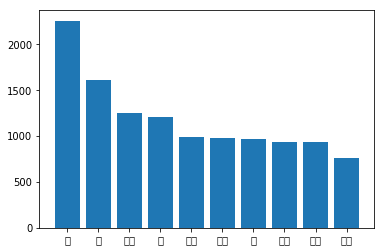

In [98]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
%matplotlib inline
plt.bar(range(10),c)
plt.xticks(range(10),w)
#日本語対応してなくて読めない(´･ω･｀)　辛い

## 38. ヒストグラム
単語の出現頻度のヒストグラム（横軸に出現頻度，縦軸に出現頻度をとる単語の種類数を棒グラフで表したもの）を描け．

## 39. Zipfの法則
単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．